In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [ ]:
train_org = pd.read_csv('train.csv') #경로 변경
test_org = pd.read_csv('test.csv')

display(train_org.head())
display(test_org.tail())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [ ]:
# 시군구로 나누는 정규표현식
location_pattern = r'(\S+) (\S+) (\S+)'

train_org[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_org = train_org.drop(columns=['시군구'])

test_org[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_org = test_org.drop(columns=['시군구'])

In [ ]:
# 도로형태로 나누는 정규표현식
road_pattern = r'(.+) - (.+)'

train_org[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_org = train_org.drop(columns=['도로형태'])

test_org[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_org = test_org.drop(columns=['도로형태'])

display(f"columns of train_org : {test_org.columns}")
display(f"columns of test_org : {test_org.columns}")

"columns of train_org : Index(['ID', '사고일시', '요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1',\n       '도로형태2'],\n      dtype='object')"

"columns of test_org : Index(['ID', '사고일시', '요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1',\n       '도로형태2'],\n      dtype='object')"

In [ ]:
#사고일시 컬럼 datetime 변환
train_org['사고일시'] = pd.to_datetime(train_org['사고일시'])
test_org['사고일시'] = pd.to_datetime(test_org['사고일시'])

In [ ]:
#year,month,day,hour 변환
train_org['year'] = train_org['사고일시'].apply(lambda x : x.year)
train_org['month'] = train_org['사고일시'].apply(lambda x : x.month)
train_org['day'] = train_org['사고일시'].apply(lambda x : x.day)
train_org['hour'] = train_org['사고일시'].apply(lambda x : x.hour)

test_org['year'] = test_org['사고일시'].apply(lambda x : x.year)
test_org['month'] = test_org['사고일시'].apply(lambda x : x.month)
test_org['day'] = test_org['사고일시'].apply(lambda x : x.day)
test_org['hour'] = test_org['사고일시'].apply(lambda x : x.hour)


In [ ]:
train_org.tail()

,ID,사고일시,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,...,ECLO,도시,구,동,도로형태1,도로형태2,year,month,day,hour
39604,ACCIDENT_39604,2021-12-31 19:00:00,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,...,3,대구광역시,수성구,수성동3가,교차로,교차로안,2021,12,31,19
39605,ACCIDENT_39605,2021-12-31 19:00:00,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,...,3,대구광역시,달서구,상인동,단일로,기타,2021,12,31,19
39606,ACCIDENT_39606,2021-12-31 21:00:00,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,...,10,대구광역시,달서구,월성동,교차로,교차로안,2021,12,31,21
39607,ACCIDENT_39607,2021-12-31 22:00:00,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,...,3,대구광역시,달서구,장동,기타,기타,2021,12,31,22
39608,ACCIDENT_39608,2021-12-31 23:00:00,금요일,맑음,건조,차대차,측면충돌,안전운전불이행,승용,남,...,6,대구광역시,서구,비산동,단일로,지하차도(도로)내,2021,12,31,23


In [ ]:
print(train_org['구'].value_counts())

달서구    9891
수성구    6707
북구     6650
동구     5341
서구     3495
달성군    2767
남구     2559
중구     2199
Name: 구, dtype: int64


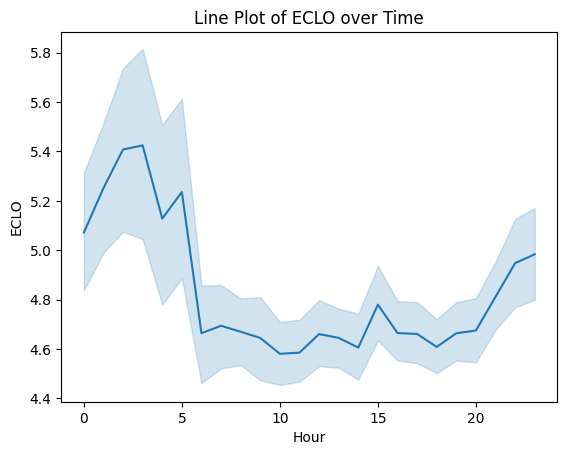

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.lineplot에 직접 데이터프레임의 열을 전달
sns.lineplot(data=train_org, x=train_org['hour'], y=train_org['ECLO'])

# 그래프 꾸미기
plt.title('Line Plot of ECLO over Time')
plt.xlabel('Hour')  # x축 레이블 설정
plt.ylabel('ECLO')   # y축 레이블 설정
plt.show()

In [ ]:
# 연령라벨링



In [ ]:
# 라벨링

labeling = [
    (train_org['hour'] >= 5) & (train_org['hour'] < 11),
    (train_org['hour'] >= 11) & (train_org['hour'] < 17),
    (train_org['hour'] >= 17) & (train_org['hour'] < 23),
    (train_org['hour'] >= 23) | (train_org['hour'] < 5)]

# 그룹에 대한 라벨
group_labels = ['A', 'B', 'C', 'D']

# '그룹' 열 추가
train_org['label'] = np.select(labeling, group_labels)

display(train_org.head())

,ID,사고일시,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,...,도시,구,동,도로형태1,도로형태2,year,month,day,hour,label
0,ACCIDENT_00000,2019-01-01 00:00:00,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,...,대구광역시,중구,대신동,단일로,기타,2019,1,1,0,D
1,ACCIDENT_00001,2019-01-01 00:00:00,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,...,대구광역시,달서구,감삼동,단일로,기타,2019,1,1,0,D
2,ACCIDENT_00002,2019-01-01 01:00:00,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,...,대구광역시,수성구,두산동,단일로,기타,2019,1,1,1,D
3,ACCIDENT_00003,2019-01-01 02:00:00,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,...,대구광역시,북구,복현동,단일로,기타,2019,1,1,2,D
4,ACCIDENT_00004,2019-01-01 04:00:00,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,...,대구광역시,동구,신암동,단일로,기타,2019,1,1,4,D


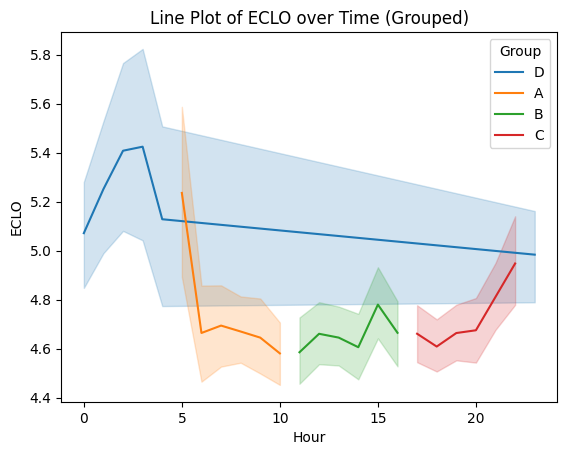

In [ ]:
# 그룹 별 ECLO 값의 추이 그래프 그리기
sns.lineplot(data=train_org, x='hour', y=train_org['ECLO'], hue='label')


# 그래프 꾸미기
plt.title('Line Plot of ECLO over Time (Grouped)')
plt.xlabel('Hour')
plt.ylabel('ECLO')
plt.legend(title='Group')
plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

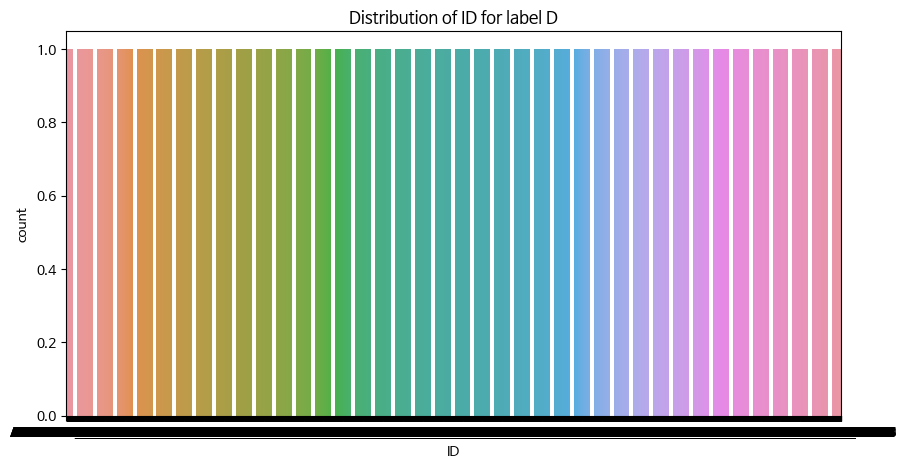

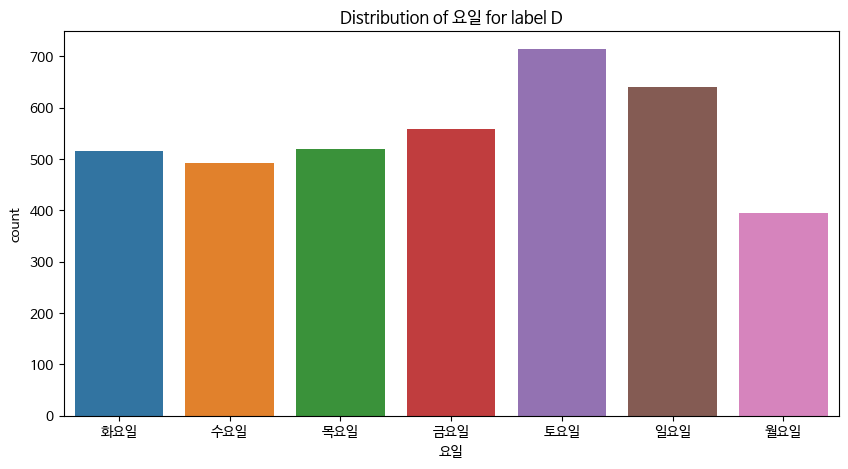

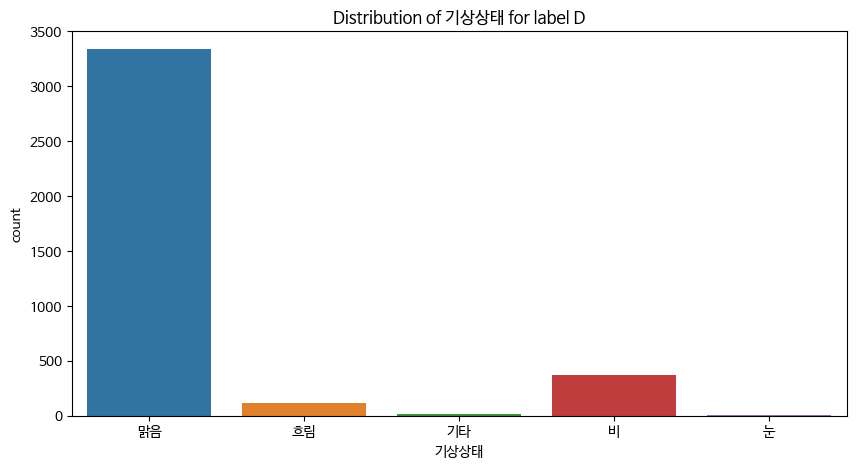

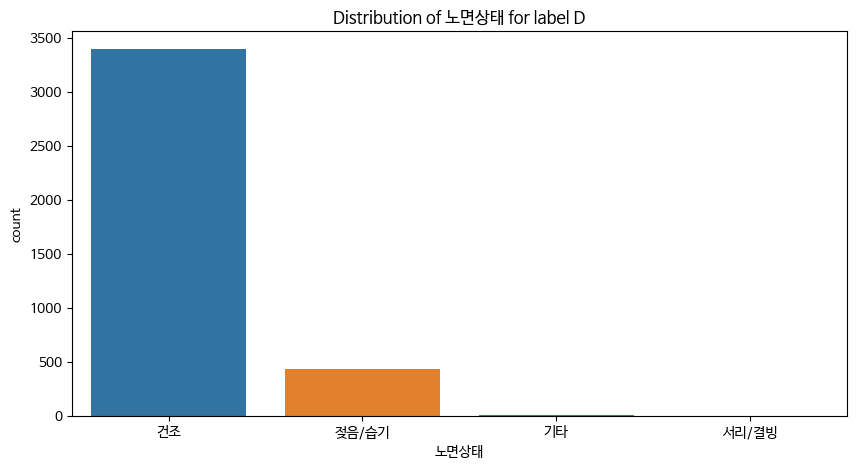

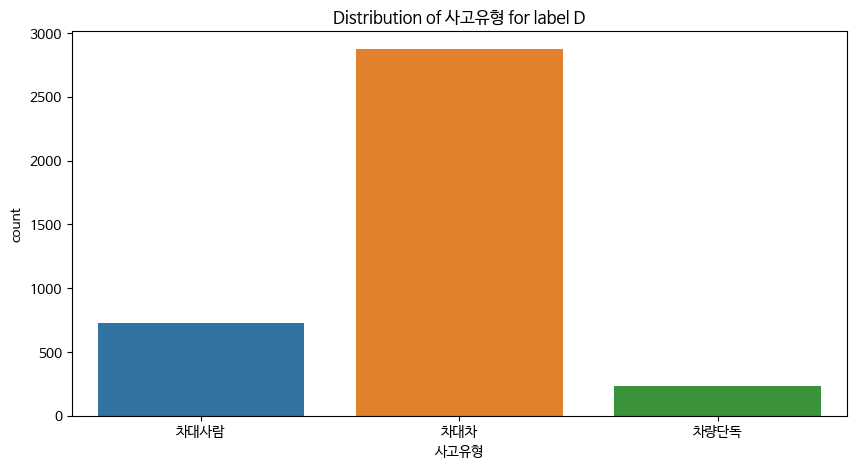

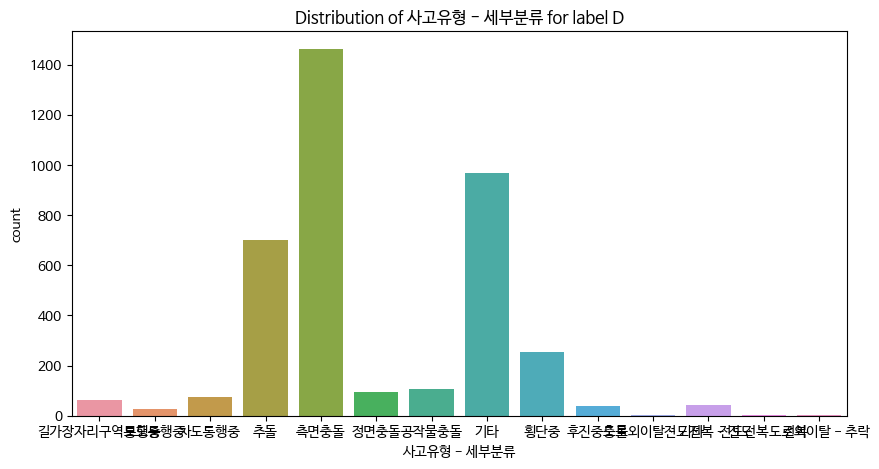

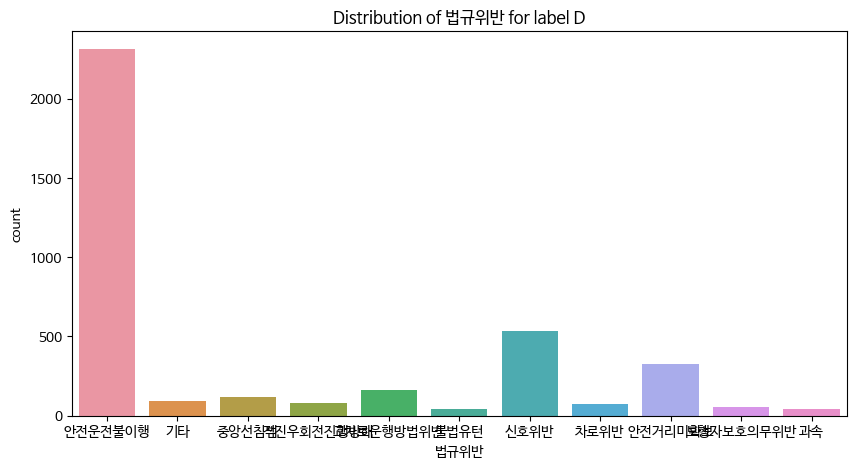

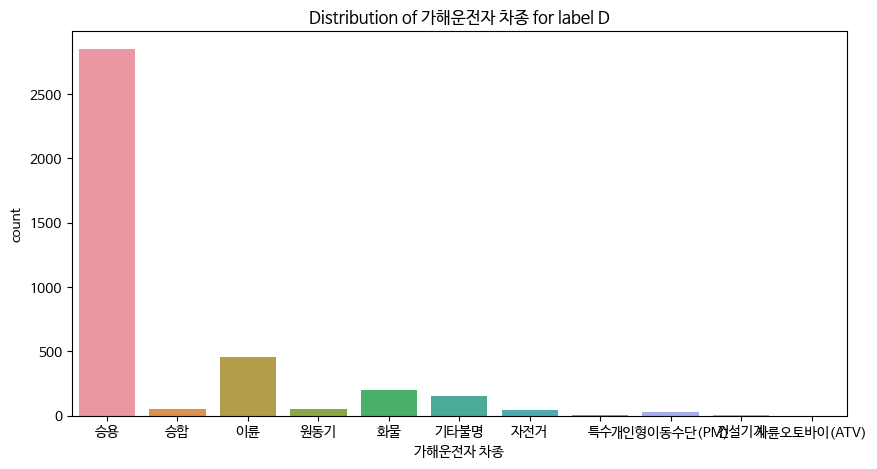

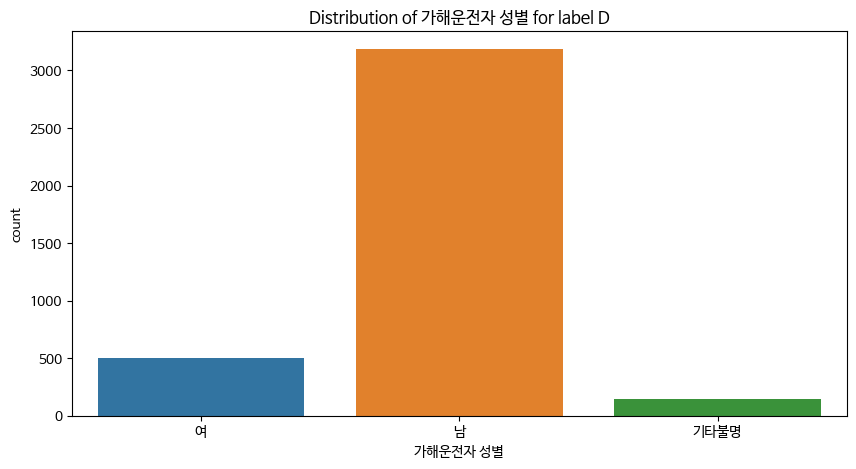

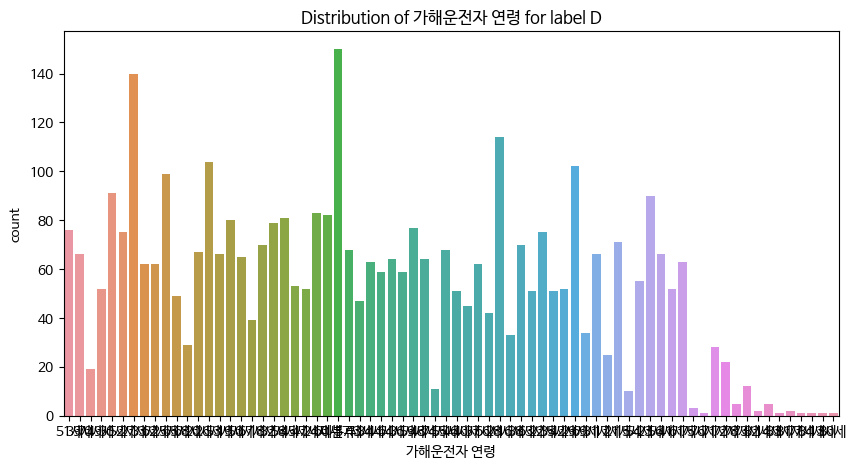

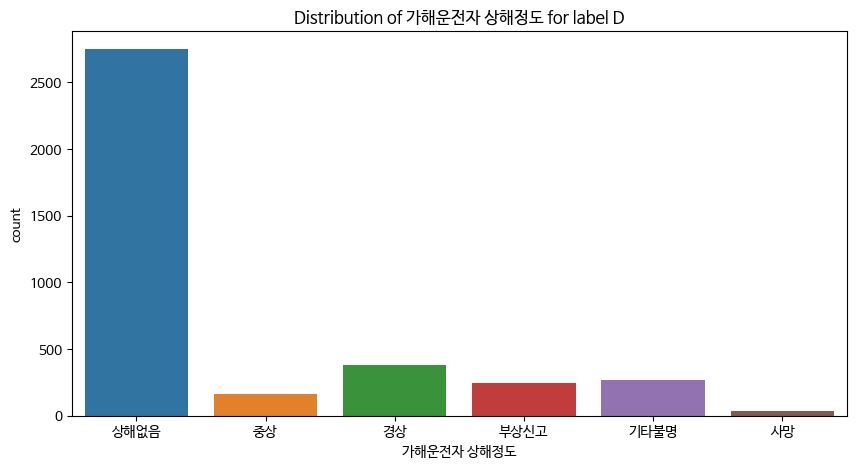

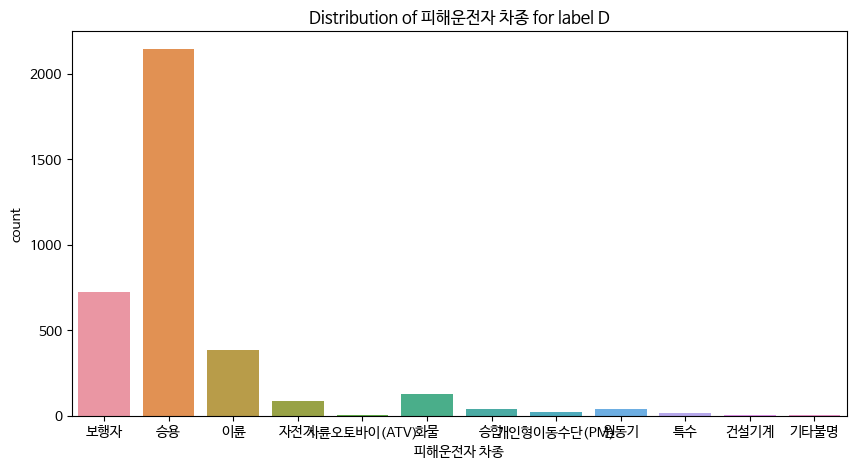

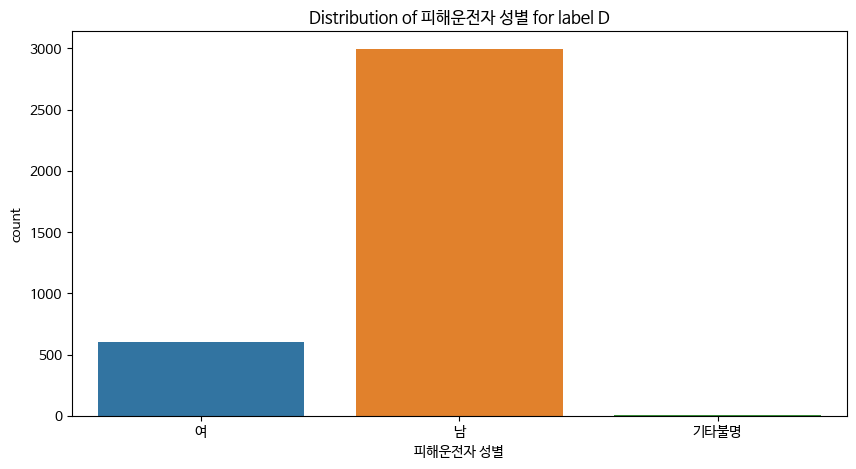

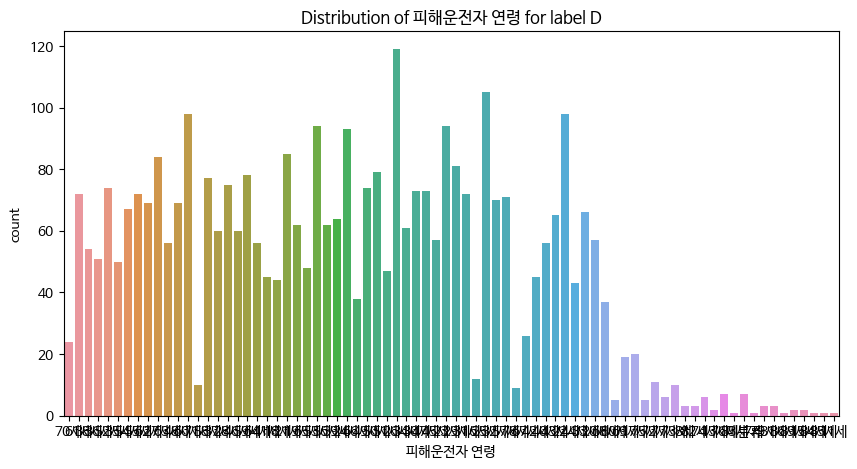

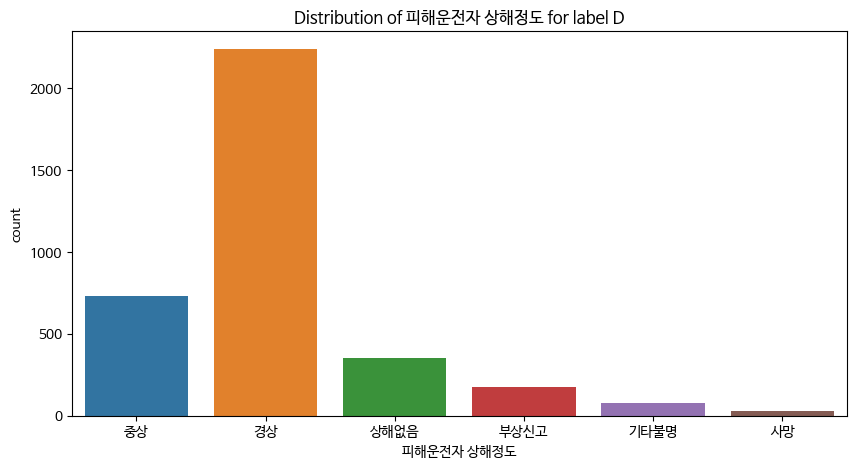

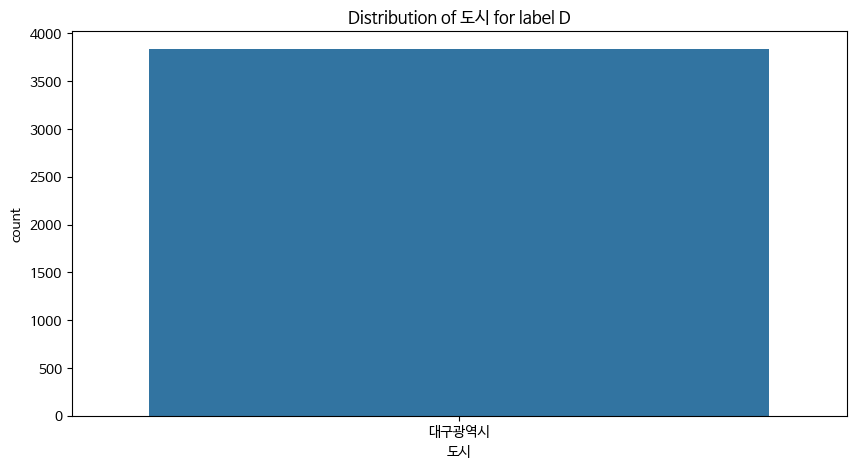

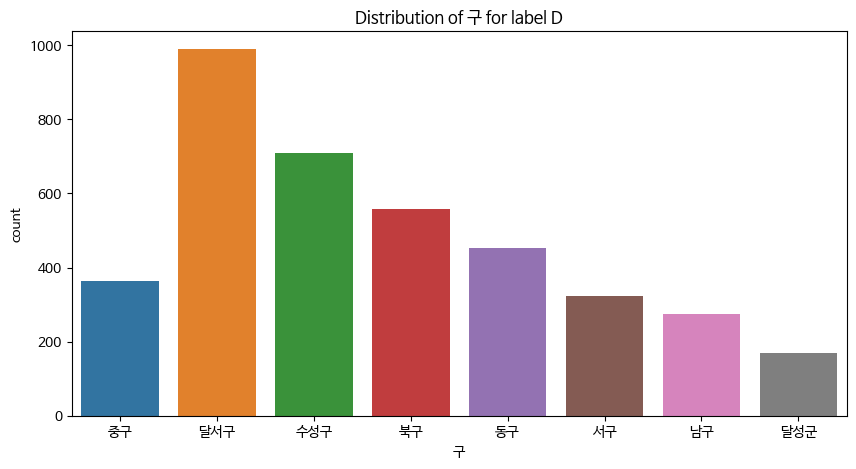

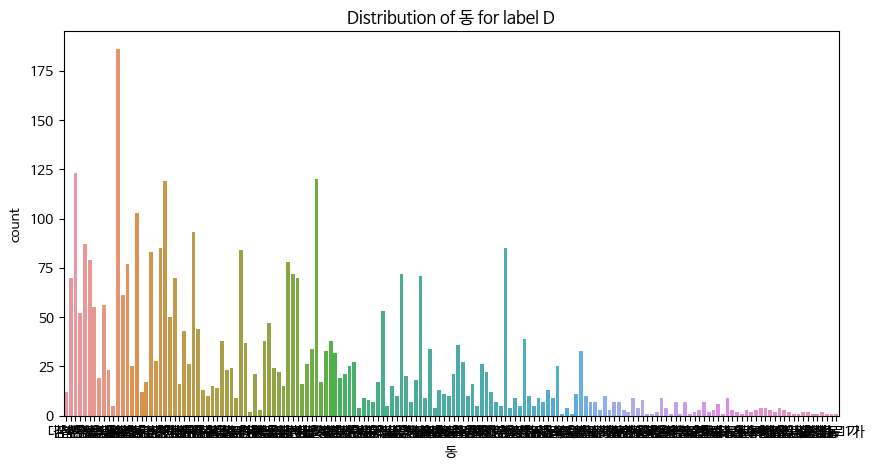

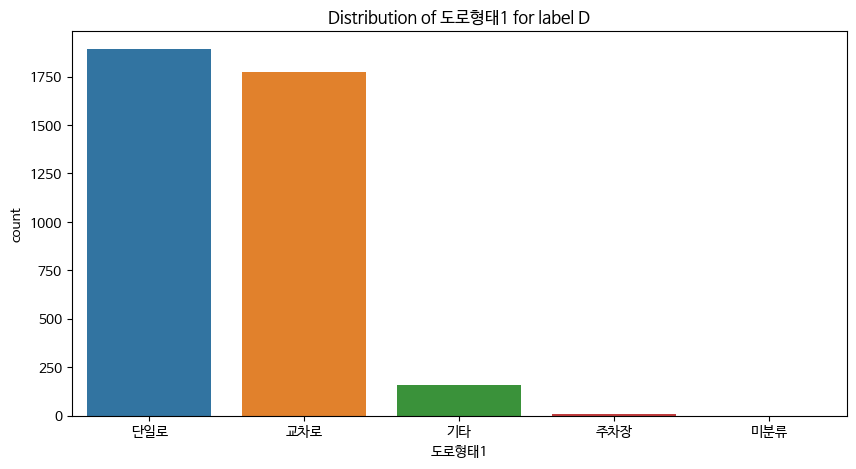

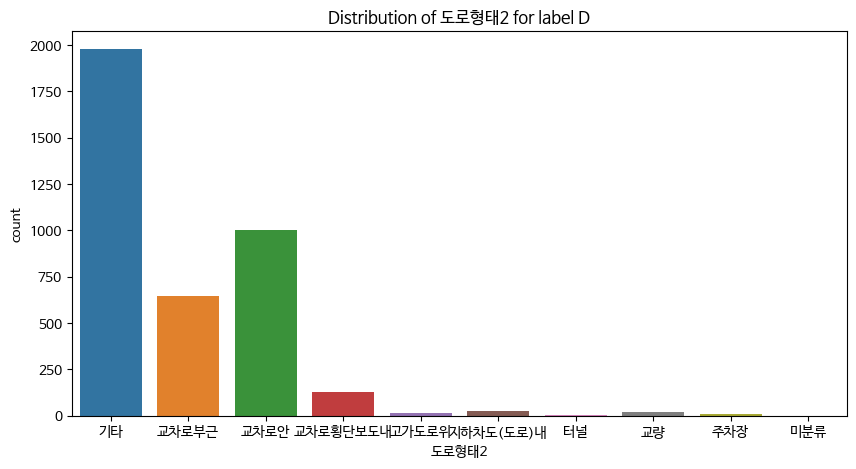

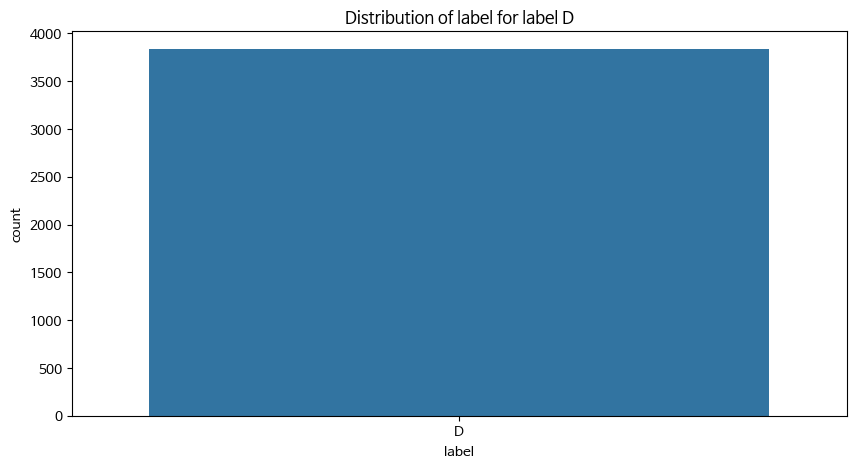

In [ ]:
# 라벨링이 D인 것들의 분포좀 보자

label_D_data = train_org[train_org['label'] == 'D']

# 각 컬럼에 대한 분포 시각화
for column in train_org.columns:
    if train_org[column].dtype == 'object':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, data=label_D_data)
        plt.title(f'Distribution of {column} for label D')
        plt.show()